In [71]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pylab as plt

In [72]:
matplotlib.rc('figure', figsize=(15, 10))

In [191]:
#each of the 3IFS runs (2.8km.4km,9km) is stored in one zarr
ds_ifs = xr.open_zarr('/work/bm1235/a270046/cycle2-sync/ddh_output/4km')

In [ ]:
ds_icon =x xr.open_zarr('/work/bm1235/k203123/experiments/ngc2009/outdata/ngc2009_mtgrm.zarr')

In [203]:
ds = ds_ifs

In [204]:
MIN_LEVEL = 125

In [205]:
wind_speed = (ds.v**2 + ds.u**2)**0.5

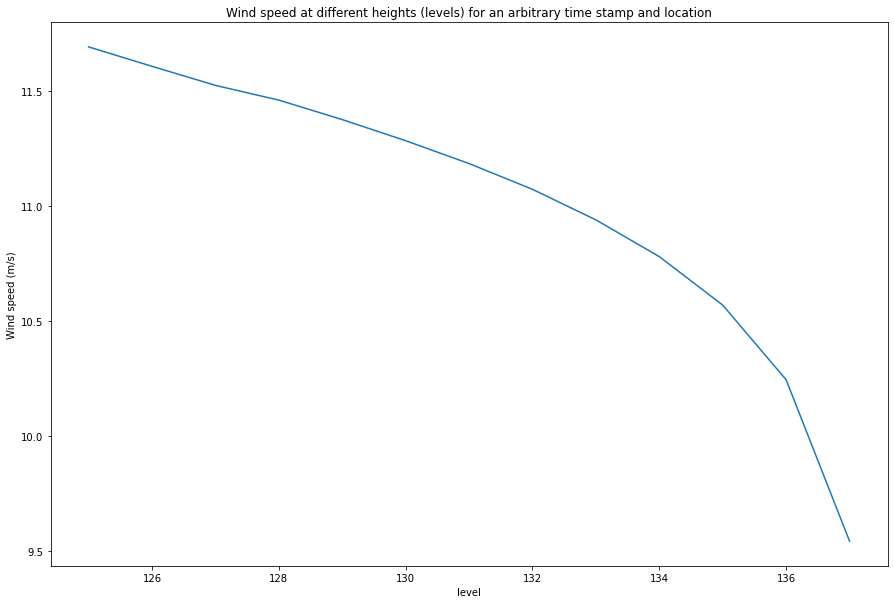

In [206]:
wind_speed_example = wind_speed.sel(level=slice(MIN_LEVEL, None)).isel(station=10, time=230)
wind_speed_example.plot()
plt.title('Wind speed at different heights (levels) for an arbitrary time stamp and location')
plt.ylabel('Wind speed (m/s)');

In [207]:
R = 8.31446261815324
R = 287
g = 9.81

In [208]:
air_pressure_at_surface = ds.p.isel(level=-1)

In [209]:
height = R * ds.t * np.log(air_pressure_at_surface / ds.p) / g
height = height.sel(level=slice(MIN_LEVEL, None))

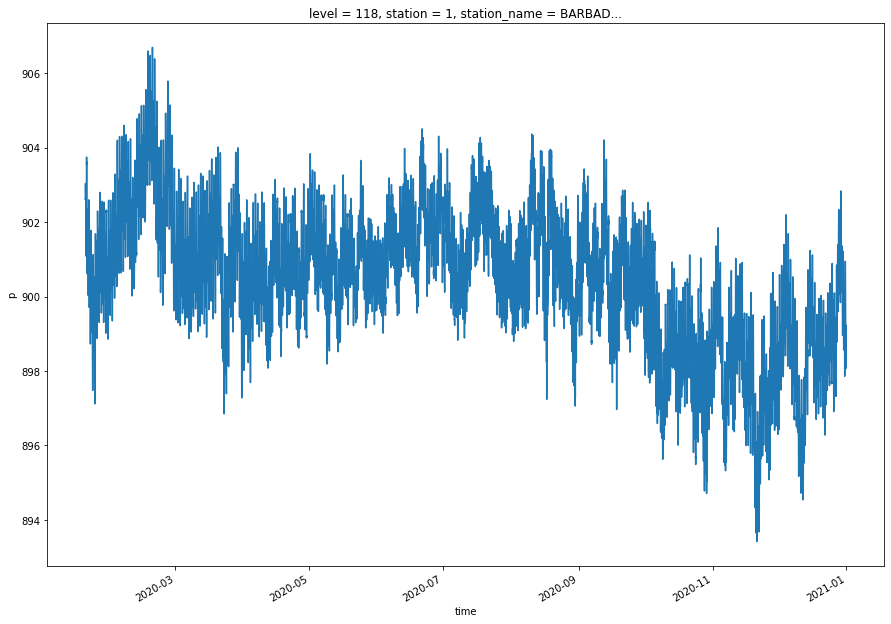

In [210]:
(1e3 * 1e-5 * ds.p.isel(level=-20, station=0)).plot()

Text(0, 0.5, 'Height above surface (m)')

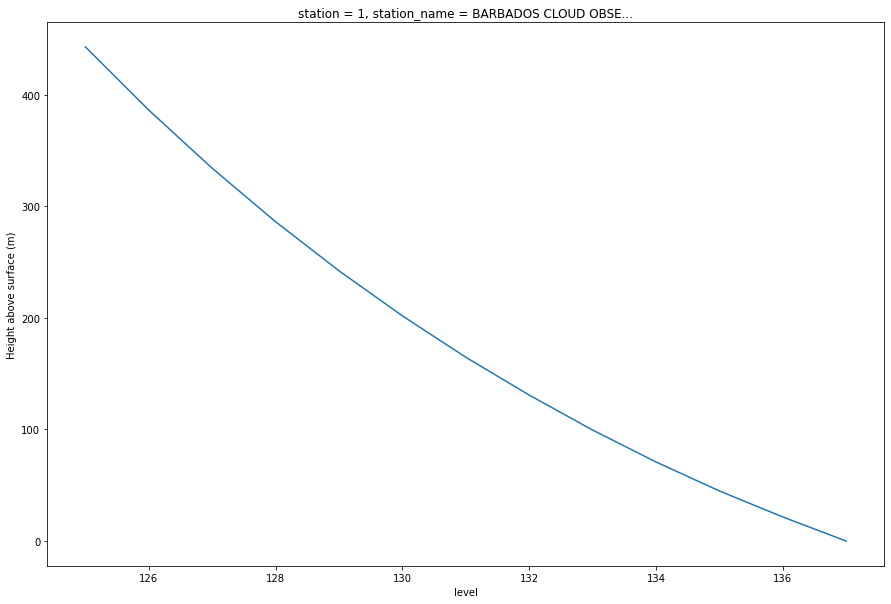

In [211]:
height.isel(time=0, station=0).plot()
plt.ylabel('Height above surface (m)')

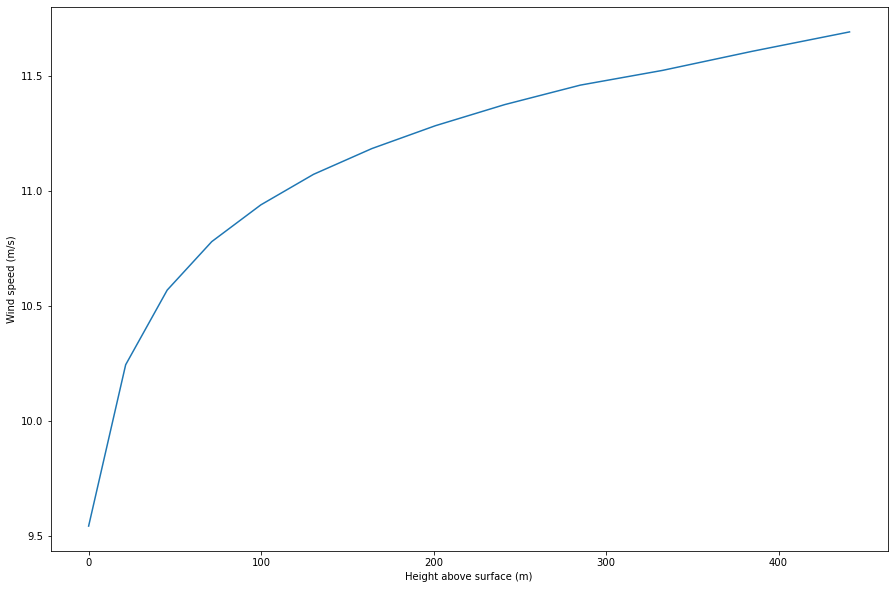

In [212]:
plt.plot(height.sel(time=wind_speed_example.time, station=wind_speed_example.station), wind_speed_example)
plt.ylabel('Wind speed (m/s)')
plt.xlabel('Height above surface (m)');